<div class="alert alert-block alert-danger">

#### Student Name: Anon Pipatpakin
#### Student ID: 33366829
#  Document Clustering
    

</div>

<div class="alert alert-block alert-info">
    
## Libaries

</div>

In [52]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

## Question 1

**I.** Derive Expectation and Maximization steps of the hard-EM algorithm for Document Clustering, in a markdown cell (ideally using Latex for clean typesetting). In particular, include
all model parameters that should be learnt and the exact expression (using the same math
convention that we saw in the Module 4) that should be used to update these parameters
during the learning process (ie., E step, M step and assignments).

For $p(d_n)$
\begin{equation}
p(d_n) = \sum_{k=1}^K  p(d_n, Z_k=1)\\
= \sum_{k=1}^K p(d_n|Z_k=1)p(Z_k = 1)\\
= \sum_{k=1}^K \varphi_k \prod_{w \in A} \mu_{k,w}^{c(w,d)}
\end{equation}

Posterior probability
\begin{equation}
p(Z_{nk}=1|d_n)= \gamma(Z_{nk}) = \frac{p(d_n |Zn=k)p(Z_n=k)}{p(d_n)}\\
=\frac{\varphi_k \prod_{w\in A} \mu_{k,w}^{c(w,d_n)}}{\sum_j \varphi_j \prod_{w \in A} \mu_{j, w}^{c(w, d_n)}}
\end{equation}


Likelihood of multiple document
\begin{equation}
p(d_1, ... , d_n) = p(d_1) \times p(d_2) \times p(d_3) \times ... \times p(d_n) \\
 = \prod_{n=1}^{N} \sum_{k=1}^K \varphi_k \prod_{w \in A} \mu_{k,w}^{c(w,d_n)}
\end{equation}

Maximize the log-likelihood
\begin{equation}
ln p(d_1, ... , d_n) = ln \prod_{n=1}^{N} \sum_{k=1}^K \varphi_k \prod_{w \in A} \mu_{k,w}^{c(w,d_n)}
\end{equation}

Since we have 2 parameters, namely $\varphi_k$ and $\mu_{k, w}$ and 2 constrains, $\sum_{k=1}^K \varphi_k = 1$ and $\sum_{w \in A} \mu_{k,w} = 1$

Consider, $\varphi_k$. \
By using largrangian equation we have
\begin{equation}
L(\varphi_k, \lambda) = ln \prod_{n=1}^{N} \sum_{k=1}^K \varphi_k \prod_{w \in A} \mu_{k,w}^{c(w,d_n)} + \lambda(\sum_{k=1}^K \varphi_k-1)\\
\end{equation}

First differentiate with respect to $\varphi_k$ 
\begin{equation}
\frac{\partial L(\varphi_k, \lambda)}{\partial \varphi_k} = \sum_{n=1}^{N} \frac{\prod_{w \in A} \mu_{k,w}^{c(w, dn)}}{\sum_j \varphi_j \prod_{w \in A} \mu_{j,w}^{c(w, dn)}} + \lambda = 0 \\
= \sum_{n=1} \frac{\gamma(Z_{nk})}{\varphi_k} + \lambda \\
\varphi_k = -\frac{1}{\lambda} \sum_{n=1}^N \gamma (Z_{nk}) 
\end{equation}

Next, differentiate with respect to $\lambda$
\begin{equation}
\frac{\partial L(\varphi_k, \lambda)}{\partial \lambda} = \frac{\partial \lambda \sum_{k=1}^K \varphi_k -1}{\partial \lambda} = 0 \\
= \sum_{k=1}^ K \varphi_k -1\\
= -\frac{1}{\lambda} \sum_{j=1}^K \sum_{n=1}^N \gamma (Z_{nj}) - 1 =0
\end{equation}
Since $$\sum_{j=1}^K \gamma (Z_nj) = 1$$
Hence,
$$\lambda = -N$$
And
$$\varphi_k = \frac{1}{N} \sum_{n=1}^ N \gamma(Znk) = \frac{N_k}{N}$$
Where
$$N_k = \sum_{n=1}^N \gamma (Z_{nk})$$

Next consider $\mu_{kw}$ and it's largrangian equation as follow:

\begin{equation}
L(\mu_{kw}, \lambda) = ln \prod_{n=1}^{N} \sum_{k=1}^K \varphi_k \prod_{w \in A} \mu_{k,w}^{c(w,d_n)} + \lambda(\sum_{k=1}^K \mu_{kw}-1)\\
\end{equation}

Maximize the equation by differentiating with respect to $\mu_{kw}$ and $\lambda$

\begin{equation}
\frac{\partial L(\mu_{kw}, \lambda)}{\partial \mu_{kw}}= \sum_{n=1}^N \frac{1}{\sum_j \varphi_j \prod_{w \in A} \mu_{j, w}^{c(w, d_n)}} \times 
\frac{\partial}{\partial \mu_{kw}} \sum_{k=1}^K \varphi_k \prod_{w \in A} \mu_{kw}^{c(w, d_n)} + \lambda = 0\\
=\sum_{n=1}^N \frac{\varphi_k \prod_{w \in A} \mu_{kw}^{c(w, d_n)} c(w, d_n)}{\sum_j \varphi_j \prod_{w \in A} \mu_{j, w}^{c(w, d_n)}} \times \sum_{w \in A} \frac{1}{\mu_{kw}} + \lambda\\
= \sum_{n=1}^ N \gamma(Z_{nk})c(w, d_n) \times \sum_{w \in A} \frac{1}{\mu_{kw}} + \lambda = 0
\end{equation}

Next consider differentiating with respect to $\lambda$
$$\frac{\partial L(\mu_{kw}, \lambda)}{\partial \lambda} = \sum_{k=1}^K \mu_{kw}-1 = 0$$

Hence, $\mu_{kw}$

$$\mu_{kw} = \frac{\sum_{n=1}^N \gamma (Z_{nk}) c(w, d_n)}{\sum_{w' \in A} \sum_{n=1}^N \gamma (Z_{nk}) c(w',d_n)}$$

Finally, we have Expectation and Maximization step as follow:

**Expectation-step**
$$\gamma(Z_{nk}) = \frac{\varphi_k \prod_{w\in A} \mu_{k,w}^{c(w,d_n)}}{\sum_j \varphi_j \prod_{w \in A} \mu_{j, w}^{c(w, d_n)}}$$

**Maximization-step**
$$\varphi_k = \frac{1}{N} \sum_{n=1}^ N \gamma(Znk) = \frac{N_k}{N}$$
$$N_k = \sum_{n=1}^N \gamma (Z_{nk})$$
$$\mu_{kw} = \frac{\sum_{n=1}^N \gamma (Z_{nk}) c(w, d_n)}{\sum_{w' \in A} \sum_{n=1}^N \gamma (Z_{nk}) c(w',d_n)}$$

For **hard clustering**, we fiind the most likely cluster that is given by
$$ k = \text{argmax   } \gamma(Z_{nk})$$

-------------------------------------------------

**II.** Load Task2A.txt file (if needed, perform text preprocessing similar to what we did in Activity
4.2).

**Aquiring Data**

In [6]:
# read data from Task2A.txt as list
with open('Task2A.txt', 'r') as file:
    text = file.readlines()

In [7]:
# check if all consist of 2 element after spliting (return true or false)
all([length == 2 for length in [len(line.split('\t')) for line in text]])

# split and save data
labels, articles = [line.split('\t')[0].strip() for line in text], [line.split('\t')[1].strip() for line in text]
# save as pd dataframe 
docs = pd.DataFrame(data = zip(labels,articles), columns=['label', 'article'])
docs.label = docs.label.astype('category')
docs.head()

,label,article
0,sci.crypt,ripem frequently asked questions archive name ...
1,sci.crypt,ripem frequently asked questions archive name ...
2,sci.crypt,ripem frequently noted vulnerabilities archive...
3,sci.crypt,certifying authority question answered if you ...
4,sci.crypt,rubber hose cryptanalysis some sick part of me...


**Feature Extraction**

In [8]:
# occur at least
min_freq = 10
feature_options = []

# extract different min_freq word in docs
for i in range(min_freq):
    # initiate CountVectorizer
    cv = CountVectorizer(lowercase= True,
                        stop_words= "english",
                        min_df= i+1, 
                        )
    # fit transfrom to articles
    features = cv.fit_transform(raw_documents= articles)
    # add each freq vertor
    feature_options += [features]
    # print length of each freq
    print((cv.get_feature_names_out()))

features = feature_options[4] # going with min_freq = 5 (words that occur at least in 5 docs)
# number of document, number of words in all docs
features.shape

['aa' 'aaa' 'aaahh' ... 'zxa' 'zz' 'zzz']
['aa' 'aachen' 'aaron' ... 'zrepachol' 'zsc' 'zv']
['aa' 'aaron' 'aas' ... 'zoology' 'zrepachol' 'zv']
['aa' 'aaron' 'aas' ... 'zoology' 'zrepachol' 'zv']
['aa' 'aaron' 'ab' ... 'zoo' 'zoology' 'zv']
['aa' 'aaron' 'ab' ... 'zoo' 'zoology' 'zv']
['aa' 'aaron' 'ab' ... 'zoo' 'zoology' 'zv']
['aa' 'aaron' 'ab' ... 'zoo' 'zoology' 'zv']
['aa' 'aaron' 'ab' ... 'zoo' 'zoology' 'zv']
['aa' 'aaron' 'ab' ... 'zoo' 'zoology' 'zv']


(2373, 8094)

**Features normalization**

Form the scatter plot below, we can see that most of ovservations are at PCA1. So, data need to been transform before clustering.

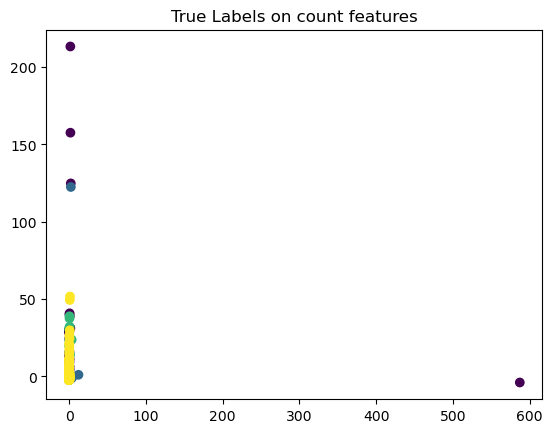

In [50]:
pca = PCA(n_components=2)
_2D_features = pca.fit_transform(features.toarray())

## plot the original data
plt.scatter(x=_2D_features[:,0],y=_2D_features[:,1], c=docs.label.cat.codes)
plt.title('True Labels on count features')
plt.show()

In [9]:
# normalize features
l2_norm = Normalizer(norm='l2')
features_normaled = l2_norm.fit_transform(features)

In [10]:
print(features.toarray().shape)

(2373, 8094)


------------------------------------

**III.** Implement the hard-EM (you derived above) and soft-EM (derived in Chapter 5 of Module
4). Please provide enough comments in your submitted code. Hint: If it helps, feel free to
base your code on the provided code for EM algorithm for GMM in Activity 4.1).

First define function that will be used for preventing numerical overflow.

In [11]:
# log sum function, preventing numerical overflow
def log_sum(vec):
    max_val = np.max(vec) # find max
    exp_v_m = np.exp(vec - max_val) # subtract max from vec
    result = max_val + np.log(sum(exp_v_m))
    return result

Implemet Document clustering class.

In [42]:
class DocClustering:
    def __init__(self, K, tau_max=200, epsilon= 0.01, random_state=None, cluster_type= "soft"):
        self.K = K
        self.tau_max = tau_max
        self.epsilon = epsilon
        self.random_state = random_state
        self.cluster_type = cluster_type
        
        

    def fit(self, X, verbose= False):
        N = X.shape[0] # get the number of documents
        W = X.shape[1] # get the number of words

        np.random.seed(self.random_state)
        
        # small value uses to prevent divide by 0
        eps = 1e-10
        X = X.toarray()
        
        # initialization
        # cluster probability to have same prob
        self.Varphi_hat_ = np.array([1/self.K] * self.K)
        # Nk effective point
        self.Nk_hat_ = self.Varphi_hat_ * N
        # initiate Mu_hat_kw
        self.Mu_kw_hat_ = np.zeros(shape=(self.K, W))
        self.Mu_kw_hat_ = np.zeros((self.K, W))
        for i in range(self.K):
            random_nums = np.random.rand(W)
            normalized_row = random_nums / sum(random_nums)
            self.Mu_kw_hat_[i] = normalized_row
        
        # posterior matrix
        r = np.zeros((N, self.K)) 
        
        # historical Mu_kw_hat_ and r
        self.Mu_kw_hat_historic_ = np.zeros(shape=(list(self.Mu_kw_hat_.shape) + [self.tau_max]))
        self.r_historic_ = np.zeros(shape=(N, self.K, self.tau_max)) 
        
        
        terminate = False
        tau = 0
        
        # Mu_kw_hat_old uses for terminate condition
        Mu_kw_hat_old = self.Mu_kw_hat_.copy()
        
        
        while (not terminate):
            if verbose: print("iteration {0}".format(tau))
            
            # E step
            # calculate estimated r        
            for n in range(N):
                # calculate the element-wise product of X and log(Mu_kw_hat) and sum along axis 1
                r[n, :] = np.log(self.Varphi_hat_) + np.sum(X[n, :] * np.log(self.Mu_kw_hat_), axis=1)
            
            # calculate denominator
            denominator = np.array([log_sum(a) for a in r])
            # normalize r
            r = r - denominator[:, np.newaxis]
            # return real r
            r = np.exp(r)
            
            # check clustering method
            # soft condition
            if self.cluster_type == "soft":
                self.r_historic_[:, :, tau] = r
            
            # hard condition
            elif self.cluster_type == "hard":
                max_clip_function = lambda x:  np.array([1 if i== x.argmax() else 0 for i in range(len(x))])
                z_n_hat = np.array(list(map(max_clip_function, r)), dtype='float32')
                r = z_n_hat
                self.r_historic_[:, :, tau] = z_n_hat

    
            # M step
            # update Nk
            
            self.Nk_hat_ = r.sum(axis=0) # sum over col of r
            
            # update Varphi
            self.Varphi_hat_ = self.Nk_hat_ / N
            
            # update Mu
            for k in range(self.K):
                self.Mu_kw_hat_[k] = ((r[:, k].T @ X) + eps) / ((r[:, k].T @ X) +eps).sum()
            self.Mu_kw_hat_historic_[:, :, tau] = self.Mu_kw_hat_
            
            
            tau += 1
            
            
            # check terminate condition
            terminate = ((tau == self.tau_max) or np.allclose(self.Mu_kw_hat_, Mu_kw_hat_old, rtol= self.epsilon))
            Mu_kw_hat_old = self.Mu_kw_hat_.copy()

        
        self.Mu_kw_hat_historic_ = self.Mu_kw_hat_historic_[:,:, :tau]
        self.r_historic_ = self.r_historic_[:, :, :tau]
        if verbose: print(f'Converged in {tau} iterations')
        
        return self
    
    def predict_proba(self, X):   
        X = X.toarray()
        N = X.shape[0]
        r = np.zeros((N,self.K))
        
        for n in range(N):
            # calculate the element-wise product of X and log(Mu_kw_hat) and sum along axis 1
            r[n, :] = np.log(self.Varphi_hat_) + np.sum(X[n, :] * np.log(self.Mu_kw_hat_), axis=1)
    
        denominator = np.array([log_sum(a) for a in r])
        r = r - denominator[:, np.newaxis]
        r = np.exp(r)
        return r
    
    
    def predict(self, x):
        probs = self.predict_proba(x) 
        preds = np.argmax(probs, axis=1) # find max along rows
        return preds    

---------------------------------------

**IV.** Set the number of clusters K=4, and run both the soft-EM and hard-EM algorithms on the
provided data.

In [43]:
# soft clustering
Soft_cluster = DocClustering(K=4, cluster_type="soft", tau_max= 200, random_state= None)
Soft_cluster.fit(features_normaled, verbose=True)

# hard clustering
Hard_cluster = DocClustering(K=4, cluster_type="hard", tau_max= 200, random_state= None)
Hard_cluster.fit(features_normaled, verbose=True)

iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
iteration 69
iteration 70
iteration 71
iteration 72
iteration 73
iteration 74
iteration 75
iteration 76
iteration

In [44]:
# label = np.argmax(Soft_cluster.r_historic_[:, :, -1], axis=1)
label_1 = Soft_cluster.predict(features_normaled)
label_2 = Hard_cluster.predict(features_normaled)

----------------------------------------------------

**V.** Perform a PCA on the clusterings that you get based on the hard-EM and soft-EM in the
same way we did in Activity 4.1. Then, plot the obtained clusters with different colors where
x and y axes are the first two principal components (similar to Activity 4.2). Based on your
plots, discuss how and why the hard and soft-EM are different in a markdown cell.

In [45]:
# normalise by dividing each feature row by its L2 norm
l2_norm = Normalizer(norm='l2')
features_normalised = l2_norm.fit_transform(features.toarray())

features_normalised.shape

(2373, 8094)

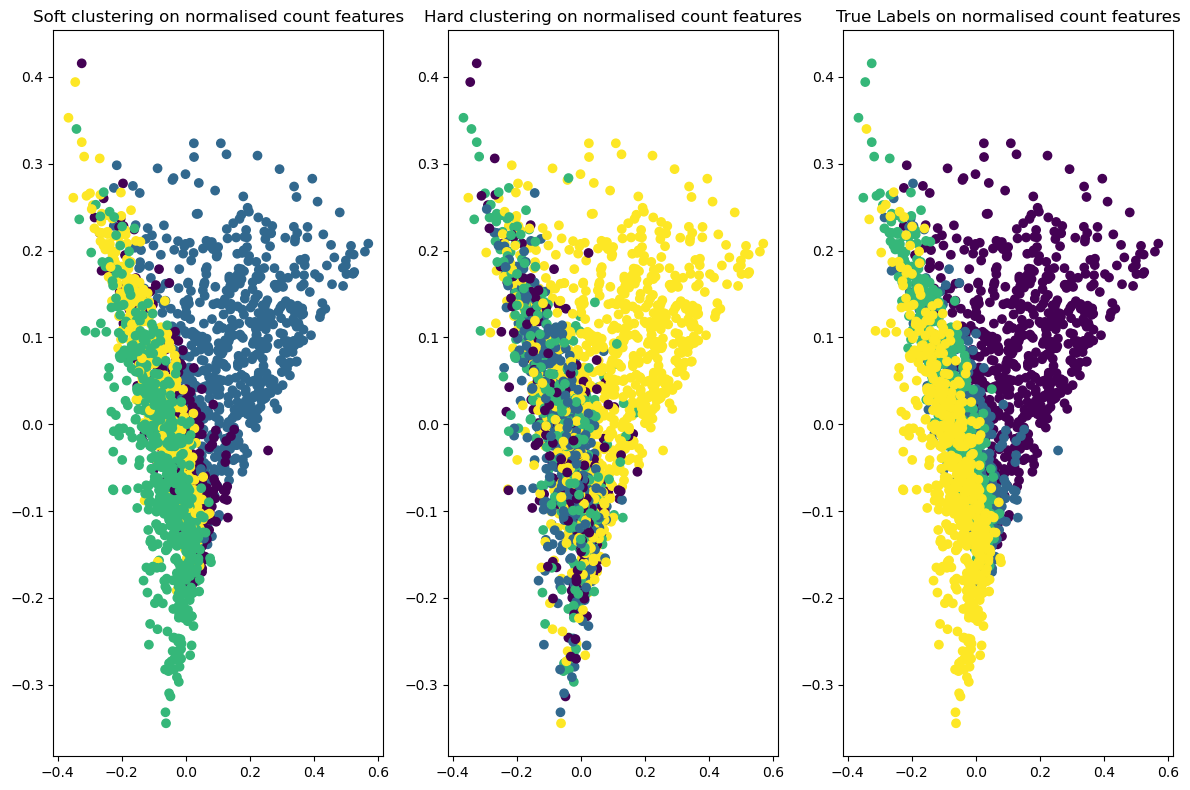

In [46]:
## perform pca
pca = PCA(n_components=2)
_2D_features = pca.fit_transform(features_normalised)

## plot the  outcome
_, axs = plt.subplots(1, 3, figsize=(12, 8), tight_layout=True)
axs[0].scatter(x=_2D_features[:,0],y=_2D_features[:,1], c=label_1)
axs[0].set_title('Soft clustering on normalised count features')

axs[1].scatter(x=_2D_features[:,0],y=_2D_features[:,1], c=label_2)
axs[1].set_title('Hard clustering on normalised count features')


## plot the original data
axs[2].scatter(x=_2D_features[:,0],y=_2D_features[:,1], c=docs.label.cat.codes)
axs[2].set_title('True Labels on normalised count features')
plt.show()

**Answer**\
By examine the above plot, we can clearly observe that both hard and soft clustering are able to separate most of the purple class correctly, howerver, for other overlaping classes soft clustering outperforms hard clustering. The reson that make them results differently is since soft clustering allows each data point belong to multiple clusters which capture the uncertainty of each dadta point hence it will provide better result in the overlap region.

**Reference:**\
Gewerc, A. (2018, November 1). Expectation-Maximization for News Clustering. Welcome to My Website. http://www.alangewerc.com/blog/EM-Clustering/
